<a href="https://colab.research.google.com/github/isabelamchaves/Introdu-o-Ci-ncia-de-Dados/blob/main/05_Classificacao_com_Regrecao_Logistica_e_Validacao_cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Classificação Binária com Regressão Logística e Validação Cruzada




## 1. Introdução

Neste notebook, vamos explorar a aplicação de um modelo de Regressão Logística para resolver um problema de classificação binária.

## 2. Importando as Bibliotecas

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Criando um conjunto de dados sintético



In [ ]:
# Criando um conjunto de dados sintético
from sklearn.datasets import make_classification

# Gerando o dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=2,
                           n_classes=2, random_state=42)

# Convertendo para DataFrame
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
df['Target'] = y

# Visualizar as primeiras linhas do dataset
df.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Target
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274,0
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470,1
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376,1
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039,0
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224,1


## 4. Dividindo o conjunto de dados em treino e teste

In [ ]:
# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando as dimensões dos conjuntos de treino e teste
print(f'Tamanho do conjunto de treino: {X_train.shape[0]} amostras')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]} amostras')

Tamanho do conjunto de treino: 700 amostras
Tamanho do conjunto de teste: 300 amostras


## 5. Validação cruzada e treinamento do modelo




In [ ]:
# Criando o modelo de Regressão Logística
model = LogisticRegression()

# Definindo a estratégia de validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizando a validação cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

# Treinando o modelo com todo o conjunto de treino
model.fit(X_train, y_train)

# Avaliando o modelo no conjunto de teste
y_pred = model.predict(X_test)

# Exibindo os resultados da validação cruzada
print(f'Pontuações da validação cruzada: {cv_scores}')
print(f'Média das pontuações: {np.mean(cv_scores):.4f}')

Pontuações da validação cruzada: [0.92 0.89 0.9  0.8  0.85 0.88 0.83]
Média das pontuações: 0.8671


## 6. Aplicando as métricas de avaliação

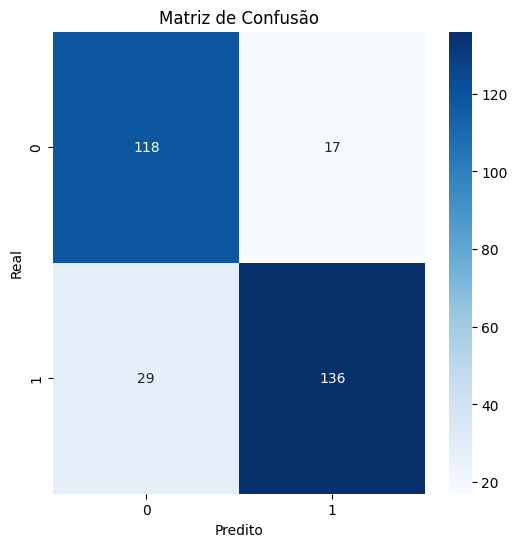

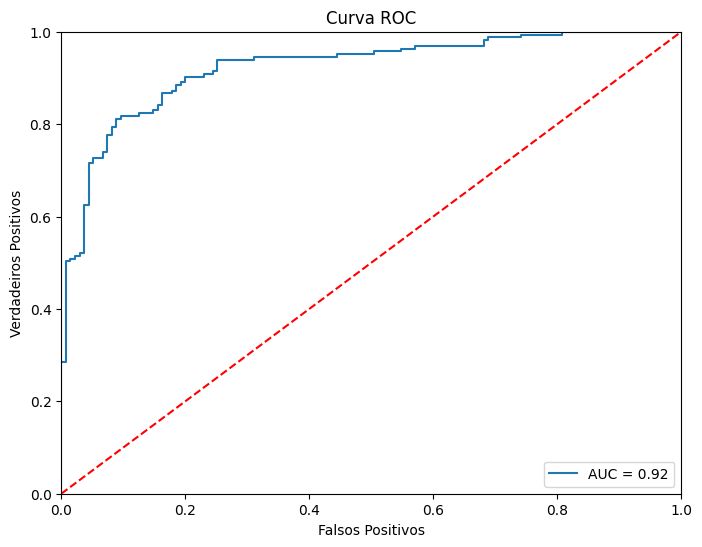

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizando a Matriz de Confusão
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Curva ROC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotando a Curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## 7. Comentando os resultados

O modelo possui uma boa acuárcia, pois, classifica corretamente os resultados, obtendo um AUC excelentes, pois estão acima de 0.9.

Ao aumentar o número de dados é possível obter um AUC melhor, e isso é esperado, uma vez que ao trabalharmos com classificação, quanto maior é o nosso número de dados, melhor será o resultado obtido.

## 8. Conclusão

Tentamos resolver um problema de classificação, ao classificar os dados binariamente. Para isso, criamos um conjunto de dados falso e treinamos um modelo de Regressão Logística.

Para avaliar o nosso modelo, fizemos uma verificação da matriz de confusão e da Curva ROC. O modelo apresentou um ótimo desempenho sendo capaz de separar as classes de uma maneira eficaz.